
# Lecture 5 - Chapter 3


## Ch. 3.2.3 Reversible reactions

Reversible reactions are written as:

$aA + bB \rightleftharpoons cC dD$. 

That means the reaction can go forward and backward, and there is a forward rate and backwards rate, as well as a net rate.

When these reactions are at steady state, in a constant volume system with no flows, we say they are at equilibrium. The concentrations at equilibrium are related to the equilibrium constant $K_C$ according to this equation:

$K_C = \frac{C_{C,eq}^c C_{D,eq}^d}{C_{A,eq}^a C_{B,eq}^b}$

For specificity consider $2B \rightleftharpoons D + H$

We would write the forward reaction rate law as:

$-r_{B,forward} = k_B C_B^2$

and the reverse rate law as:

$r_{B,reverse} = k_{-B} C_D C_H$

The net rate of consumption is the sum of these two reactions (B is consumed in the forward reaction, and produced in the backwards reaction).

$r_B = -k_B C_B^2 + k_{-B} C_D C_H$

Note we have three concentrations in this rate law! They are related by stoichiometry, and later we will see how to do that. 

At equilibrium, we have that the net rate must be zero (or else the concentrations will be changing). So:

$k_B C_B^2 = k_{-B} C_D C_H$

Let's rewrite that as:

$\frac{k_B}{k_{-B}} = \frac{C_D C_H}{C_B^2} = K_C = \exp(-\frac{\Delta G_{rxn}}{R T})$

There is an important connection between thermodynamics and kinetics here: *They must be consistent!* Of the three quantities $k_B$, $k_{-B}$ and $K_C$, only two are independent of each other.

This leads to an alternative way to write this rate law:

$-r_B = k_B \left(C_B^2 - \frac{C_D C_H}{K_C}\right)$.

You choose which one to use based on the information given. 


## An example with the water gas shift reaction

The WGS reaction is $CO + H_2O \rightleftharpoons CO_2 + H2$. It is used to produce hydrogen from water. The reaction is exothermic, with $\Delta G_{rxn}=730$ cal/mol CO.

Let's write the reaction as $ A + B \rightleftharpoons C + D$.

If we start out with 5 atm of water vapor and 5 atm of CO at 1000K, estimate the equilibrium composition.

To do this we need to compute the equilibrium constant.



In [1]:
G = 730  # cal/mol
T = 1000 # K
R1 = 1.987 # cal / mol / K

import numpy as np
Kc = np.exp(-G / (R1 * T))

print('Kc = {:1.2f}'.format(Kc))

Kc = 0.69

Kc is less than one, so we expect there to be slightly more reactants than products at equilibrium.

Next, we know that $K_C = \frac{C_{C,eq} C_{D,eq}}{C_{A,eq} C_{B,eq}}$ but we do not know the equilibrium concentrations.

However, if we know the conversion, we can compute the concentrations. For example, if the conversion is $X$ then $C_A = C_{A0} (1 - X)$. The amount of A that has reacted is simply $C_{A0} X$. So, by stoichiometry, we know that:

$C_B = C_{B0} - C_{A0}X$

$C_C = C_{C0} + C_{A0}X$

$C_D = C_{D0} + C_{A0}X$

Now, we have all the concentrations in terms of one unknown, $X$. We just have to plug those values into the $K_C$ equation, and solve it for X. We use fsolve for the solution. We need a guess for the solution, and in this case it makes sense to guess about 50% conversion since there should be roughly equal amounts of reactants and products according to the equilibrium constant.



In [1]:
R2 = 0.082 # L atm / (K mol)

Pa0 = 5 # atm
Pb0 = 5 # atm

Ca0 = Pa0 / R2 / T # mol / L
Cb0 = Pb0 / R2 / T
Cc0 = 0
Cd0 = 0

It will be convenient to define a function that calculates the concentrations from the conversion. The reason is we will eventually solve for the conversion, but to do that we need to compute the concentrations at a conversion. Then, when we have the solution, we have to recalculate the concentrations to get the answer that we want. So, we use this function twice, once in the objective function for fsolve, and once at the end to get our answer. Anytime you use code twice, you can think about making a function to reuse it.



In [1]:
def concentrations(X):
    Ca = Ca0 * (1 - X)
    Cb = Cb0 - Ca0 * X
    Cc = Cc0 + Ca0 * X
    Cd = Cd0 + Ca0 * X
    return Ca, Cb, Cc, Cd

Finally, we use fsolve to setup and solve this equation for $X_{eq}$:

$K_C = \frac{C_{C,Xeq} C_{D,Xeq}}{{C_{A,Xeq} C_{B,Xeq}}}$.



In [1]:
def objective(X):
    Ca, Cb, Cc, Cd = concentrations(X)
    z = Kc - (Cc * Cd) / (Ca * Cb)
    return z

from scipy.optimize import fsolve

xans, = fsolve(objective, 0.5)
print('The equilibrium conversion is {:1.2f}'.format(xans))

for label, conc in zip(['A', 'B', 'C', 'D'], concentrations(xans)):
    print('The equilibrium concentration of {} is {:1.3g} M'.format(label, conc))

The equilibrium conversion is 0.45
The equilibrium concentration of A is 0.0333 M
The equilibrium concentration of B is 0.0333 M
The equilibrium concentration of C is 0.0277 M
The equilibrium concentration of D is 0.0277 M

In the code block above, the zip function takes two lists and returns an iterator that provides an element from each list until one list runs out.

As you can see in the solution, we have slightly more reactants than products, consistent with less than 50% conversion, and an equilibrium constant that is less than one.

We used stoichiometry to relate the concentrations of each species to each other through the conversion to get a single equation with a single unknown in it.

Note that there is no rate law in this calculation. We are solving a thermodynamic problem.


# Another example of stoichiometry (3-2)

Consider the reaction $3A + B \rightarrow 3C + D$. If we start out with 10 mol/L of A, and 2 mol/L of B what is the concentration of D when the conversion of A is 20%?

Since we use $A$ as our basis, we have normalize this reaction as:

$A + 1/3 B \rightarrow C + 1/3 D$

So, if X = 0.2, we will have (in a constant volume system) $C_A = C_{A0}(1 - X)$ and the amount of A per unit volume that has reacted as $C_{A0} X$

By stoichiometry we have that the number of moles of B that have reacted per unit volume is $1/3 C_{A0} X$, and similarly, the number of moles of C that are produced per unit volume is $C_{A0} X$ and the number of moles of D produced per unit volume is $1 / 3 C_{A0} X$. We can simply evaluate these expressions to calculate the concentrations 



In [1]:
X = 0.2

Ca0 = 10
Cb0 = 2
Cc0 = 0
Cd0 = 0

print('Ca at X={} is {} M.'.format(X, Ca0 * (1 - X)))
print('Cb at X={} is {} M.'.format(X, Cb0 - 1 / 3 * Ca0 * X))
print('Cd at X={} is {} M.'.format(X, 1 / 3 * Ca0 * X))

Ca at X=0.2 is 8.0 M.
Cb at X=0.2 is 1.3333333333333335 M.
Cd at X=0.2 is 0.6666666666666666 M.

Now, how about at X=0.9?



In [1]:
X = 0.9
print('Ca at X={} is {} M.'.format(X, Ca0 * (1 - X)))
print('Cb at X={} is {} M.'.format(X, Cb0 - 1 / 3 * Ca0 * X))
print('Cd at X={} is {} M.'.format(X, 1 / 3 * Ca0 * X))

Ca at X=0.9 is 0.9999999999999998 M.
Cb at X=0.9 is -1.0 M.
Cd at X=0.9 is 3.0 M.

Aack! negative concentration in species B! We neglected to determine what the limiting reagent here is. Once $C_B = 0$ the reaction will stop, so in this case it is not possible to achieve 90% conversion of A. In this case, we should have used species B for the basis. Note we still cannot get 90% conversion of A, even for 100% conversion of B.

**Exercise:** Determine the maximum conversion of A that is possible. 


# Equations for concentration of flow systems

For a flow system we define concentration as $C_A = F_A / \nu$. With species A as a basis, we can write $F_A = F_{A0} (1 - X)$, and again we have that the amount of A that has reacted is $F_{A0} X$. 

For a reaction like:

$A + \frac{b}{a} B \rightarrow \frac{c}{a} C + \frac{d}{a} D$

we can use stoichiometry to determine how much of each species has reacted or been produced. So, if $F_{A0} X$ is the amount that A has reacted, then:

$b/a F_{A0} X$ is how much B has reacted

$c/a F_{A0} X$ is how much C was produced

$d/a F_{A0} X$ is how much D was produced.

So, the molar flows of each species is then:

$F_A = F_{A0} - F_{A0} X = F_{A0} (1 - X)$

$F_B = F_{B0} - \frac{b}{a} F_{A0} X$

$F_C = F_{C0} + \frac{c}{a} F_{A0} X$

$F_D = F_{D0} + \frac{d}{a} F_{A0} X$

The book tries to "simplify" these equations with variables like $\Theta_B = \frac{F_{B0}}{F_{A0}}$. This does not make sense in my opinion. You will not see me do it. I think it is easier to use the molar flows directly in code. Decide for yourself below.

For liquid systems, the volumetric flow is usually constant (assuming no density change from the reaction), so we just divide the molar flows by the volumetric flows to get the concentrations: $C_A = F_A / \nu$.

For gas systems, it is more complicated; the volumetric flow is only constant if there is no change in the number of moles in the reaction mixture. Recall that the ideal gas law is $P V = n R T$ or for a flow system: $P \nu = F R T$. If $F$ (the total molar flow) changes due to reactions, then the volumetric flow will change too.

For now, let's consider an isobaric (constant P) and isothermal (constant T) situation with ideal gases. At the entrance of a reactor we have:

$P \nu_0 = F_{T0} R T$

Somewhere else in the reactor we might have:

$P \nu = F_T R T$.

We can take the ratio of these equations to yield:

$\nu = \nu_0 \frac{F_T}{F_{T0}}$ 

where $F_{T0}$ is the total inlet molar flow, and $F_T$ is the molar flow at the point of interest. 

Sometimes, the molar flow does not change, for example in the reaction $A \rightarrow B$, we have a mole of reactants producing a mole of products, and the total moles is always constant.

For $A + B \rightarrow C$, however, two moles of reactants produce one mole of products, so  the molar flow decreases with conversion, and thus the volumetric flow will decrease with conversion.

In contrast, $A \rightarrow 2B$, has one mole of reactant producing two moles of product, so the total molar flow increases and the volumetric flow increases with conversion.

In the book they define $\delta$ and $\epsilon$. We will not be using those. It is easier to just compute the total molar flows.


## An example to highlight the difference between constant volume and flow systems


### A constant volume batch reactor

The reaction $A \rightleftharpoons 2B$ has an equilibrium constant of $K_C = 0.1$ mol/L at 340K. A constant volume batch reactor starts with pure A at 2 atm. Compute the equilibrium conversion.



In [1]:
Pa0 = 2 # atm
R = 0.082 # L atm / (K mol)
T = 340 # K

Ca0 = Pa0 / R / T

Kc = 0.1  # mol / L

def objective(X):
    Ca = Ca0 * (1 - X)
    Cb = 2 * Ca0 * X
    return Kc - Cb**2 / Ca

Xb, = fsolve(objective, 0.5)
print('The equilibrium conversion in a batch reactor is {:1.2f}.'.format(Xb))

The equilibrium conversion in a batch reactor is 0.44.


# In a flow reactor

Now, compute the equilibrium conversion in a flow reactor. Note the "reactor volume" is still constant, but the volumetric flow is not constant since we have a mole change. We still have these relations:

$F_A = F_{A0}(1 - X)$

In this case there is no inlet molar flow of B, so using stoichiometry we get

$F_B = 2 F_{A0}X$

But to actually calculate the concentrations with these we need the volumetric flow, and by inspection you can see for this gas phase reaction that the total number of moles will increase with conversion.

$C_A = \frac{F_A}{\nu}$

$C_B = \frac{F_B}{\nu}$

we need to calculate the volumetric flow from:

$\nu = \nu_0 \frac{F_A + F_B}{F_{A0}}$

We can compute the inlet volumetric flow if we specify the inlet molar flow, in this case say it is 3 mol A/min.
$\nu_0 = \frac{F_{A0} R T}{P}$



In [1]:
Fa0 = 3  # mol / min
Ft0 = Fa0 

nu0 = (Fa0 * R * T) / Pa0
print('The inlet volumetric flow is {:1.2f} L/min'.format(nu0))

The inlet volumetric flow is 41.82 L/min

Now we are ready to setup the code to solve:

$K_C = \frac{C_{B,eq}^2}{C_{A,eq}}$.

For a given conversion we have to compute the molar flow of each species, and the volumetric flow. *Then* we compute the concentrations, and plug them into the equation. Here is an objective function that does those things.



In [1]:
def objective(X):
    Fa = Fa0 * (1 - X)
    Fb = 2 * Fa0 * X
    Ft = Fa + Fb

    # compute the volumetric flow
    nu = nu0 * Ft / Ft0

    # Now we get the concentrations
    Ca = Fa / nu
    Cb = Fb / nu

    return Kc - Cb**2 / Ca

In [1]:
Xflow, = fsolve(objective, 0.5)
print('In the flow system the equilibrium conversion is {:1.2f}'.format(Xflow))

In the flow system the equilibrium conversion is 0.51

It should strike you as interesting that you can get a higher conversion in the flow system for this reaction! That happens because the system is open and operates at *constant pressure*. In contrast to the batch reactor which is closed and operates at *constant volume*. In the batch reactor the pressure increases, and LeChatelier's principle pushes this reaction towards reactants since there are more moles of products than for reactants.

Recall we express the rate law for this reaction as:

$-r_A = k_A \left(C_A - \frac{C_B^2}{K_C}\right)$

To create a Levenspiel plot for a flow reactor ($\frac{1}{-r_A}$ vs $X$, we have to compute the conversion dependent molar flows and volumetric flow so we can compute the rate. In this case we are given $k_A = 0.5$ 1/min. Note that the maximum conversion we can expect here is the equilibrium conversion, or about 0.5.



In [1]:
ka = 0.5 # 1/min

X = np.linspace(0, 0.5)
Fa = Fa0 * (1 - X)
Fb = 2 * Fa0 * X
Ft = Fa + Fb

# compute the volumetric flow
nu = nu0 * Ft / Ft0

# Now we get the concentrations
Ca = Fa / nu
Cb = Fb / nu

Now we compute the rate, and then the Levenspiel plot.



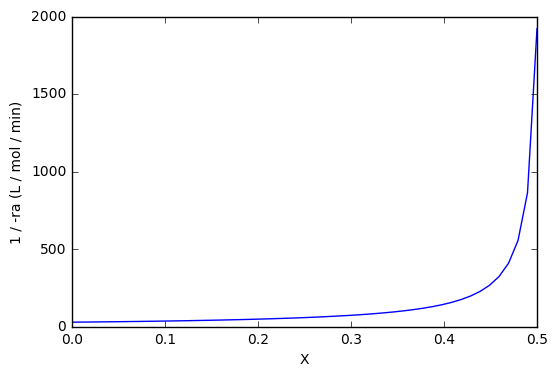

In [1]:
ra = -ka * (Ca - Cb**2 / Kc) 

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(X, 1 / -ra)
plt.xlabel('X')
plt.ylabel('1 / -ra (L / mol / min)')

Just for fun we consider the volume required to get a conversion of X=0.4.



In [1]:
X = 0.4

Fa = Fa0 * (1 - X)
Fb = 2 * Fa0 * X
Ft = Fa + Fb

# compute the volumetric flow
nu = nu0 * Ft / Ft0

# Now we get the concentrations
Ca = Fa / nu
Cb = Fb / nu 

ra = -ka * (Ca - Cb**2 / Kc)

V = Fa0 * X / -ra
print('The required volume is {0:1.2f} L.'.format(V))

The required volume is 172.16 L.

I am pretty sure there is a mistake in the book on this example. There seems to be an error of a factor of 10 in equation E3-6.12.


# A final example

A mixture of 28% SO<sub>2</sub> and 72% air flows into a flow reactor where the SO<sub>2</sub> is oxidized according to this reaction:
 $2 SO_2 + O_2 \rightarrow 2 SO_3$

Let's write this as:

$2 A + B \rightarrow C$.

The total pressure is 1485 kPa at 227 °C. Calculate the concentrations of each species as a function of conversion.

The tricky point is there are 3 moles of reactants, and 2 moles of products. Also, there is an inert present, the N<sub>2</sub> in the air (air is 79% N<sub>2</sub> and 21% O<sub>2</sub>). We have to include that in the total molar flow.

Recall that:

$P \nu_{0} =  F_{T0} R T$

Here we express this as:

$\frac{F_{T0}}{\nu_0} = C_{T0} = \frac{P}{R T}$

which gives us the total inlet concentration. 28% of that is SO<sub>2</sub>. Of the remaining gas, 79% of that is N<sub>2</sub> and the rest is oxygen.



In [1]:
P = 1485 # kPa
R = 8.314  # L kPa / (mol K)
T = 227 + 273.15 # K

Ct0 = P / R / T

Ca0 = 0.28 * Ct0

C0 = 0.72 * Ct0 # this is the rest of the gas
Cb0 = 0.21 * C0 # oxygen
Cc0 = 0 # the product
Cd0 = 0.79 * C0 # N2

print('''The inlet concentration of SO2 is {Ca0:1.2f} M.
The inlet concentration of O2 is {Cb0:1.3f} M.
The inlet concentration of S03 is {Cc0:1.2f} M.
The inlet concentration of N2 is {Cd0:1.2f} M.'''.format(**locals()))

The inlet concentration of SO2 is 0.10 M.
The inlet concentration of O2 is 0.054 M.
The inlet concentration of S03 is 0.00 M.
The inlet concentration of N2 is 0.20 M.

The reaction requires two moles of SO<sub>2</sub> per mole of oxygen. You can see that SO<sub>2</sub> is the limiting reactant here.

We cannot use concentration and conversion directly here, because the volumetric flow will change. We know that:

$F_A = F_{A0} (1 - X)$

and

$\nu = \nu_0 \frac{F_A + F_B + F_C + F_I}{F_{T0}}$

Our problem is currently underspecified; we have not said what the volumetric flow is. At this point we can set it to be anything. Once we do that we can compute all the required quantities.



In [1]:
v0 = 1 # L / min
Ft0 = v0 * Ct0

# initial molar flows of each species
Fa0 = v0 * Ca0
Fb0 = v0 * Cb0
Fc0 = v0 * Cc0
Fd0 = v0 * Cd0

For specificity, let's calculate concentrations at X=0.5. Now, if we use species A as the basis, *we have to normalize our reaction*.

$A + 1/2 B \rightarrow C$

Then we can calculate the molar flows of each species. Note there is a molar flow of N2 also, but it does not change because it is inert and does not participate in the reaction.



In [1]:
X = 0.5

Fa = Fa0 * (1 - X)
Fb = Fb0 - 0.5 * Fa0 * X
Fc = Fc0 + Fa0 * X

Next, we calculate the volumetric flow and concentrations. We need the *total* molar flow, including the inerts.



In [1]:
Ft = Fa + Fb + Fc + Fd0

v = v0 * Ft / Ft0
print('The volumetric flow is {:1.2f} L/min'.format(v))

The volumetric flow is 0.93 L/min

Clearly the volumetric flow has slightly decreased. That should make sense, we are losing moles in the reaction. Finally, let's compute the concentrations.



In [1]:
Ca = Fa / v
Cb = Fb / v
Cc = Fc / v
Cd = Fd0 / v # This is the inert

print('''The concentration of SO2 is {Ca:1.2f} M.
The concentration of O2 is {Cb:1.3f} M.
The concentration of SO3 is {Cc:1.2f} M.
The concentration of N2 is {Cd:1.2f} M.'''.format(**locals()))

The concentration of SO2 is 0.05 M.
The concentration of O2 is 0.031 M.
The concentration of SO3 is 0.05 M.
The concentration of N2 is 0.22 M.

How about that. The concentration of the inert changed, even though it did not react with anything! That happened because the volumetric flow changed.


# Summary

-   We learned about reversible reactions, how to express their rate laws, and how to determine equilibrium conversion and composition.

-   We learned about using stoichiometry to relate changes in molar quantities of one species to the changes in another.
    -   We will use stoichiometry extensively.

-   We learned to calculate concentrations in flow systems, including gas systems when there changes in the molar flow.

It is always safe to define $C_A = \frac{F_A}{\nu}$ and to calculate each quantity. 

